# Ejemplo práctico 2. Modelo de clasificación binaria
### Guía para la configuración de redes neuronales 

En la siguiente guía se muestran las configuraciones básicas para una red neuronal. El modelo se adapta a los parámetros que se consideran relevantes para la predicción. En esta versión se utiliza Tensorflow 2.0, Keras, sklearn.

El modelo consta de una red neuronal de ocho capas, "relu", "binary_croosentropy" y de optimizador "adam". 


In [592]:
import tensorflow as tf 
from tensorflow import keras

In [593]:
import pandas as pd             # Librería para el manejo de datafames
import matplotlib.pyplot as plt #Librería para visualizar gráficas
import numpy as np

In [594]:
from sklearn.preprocessing import StandardScaler    #escalar valores de procesado 
from sklearn.preprocessing import LabelEncoder      #encoding target values 
from sklearn.utils import shuffle                   # Shuffling data 
from sklearn.model_selection import train_test_split #splitting the dataset into training and validation


Leemos el archivo guardado en nuestra carpeta y lo guardamos en la variable "data"

In [595]:
data = pd.read_csv('datos/titanic.csv')
data = shuffle(data) # randomize the data

Visualizamos los datos de nuestro archivo. De esta forma verificamos si cargo correctamente

In [596]:
data.shape
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q


Iniciamos un proceso de filtrado de datos. Con la función "drop" eliminamos las columnas que no vamos a utilizar en nuestro modelo

In [597]:
#Quitar las columnas que no nos sirven para el entrenamiento
X = data.drop (labels= ['Name', 'Ticket','Parch','Survived'], axis = 1)
X.head() #Visualizamos las primeras filas

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
697,698,3,female,NaN,0,7.7333,NaN,Q
311,312,1,female,18.0,2,262.3750,B57 B59 B63 B66,C
779,780,1,female,43.0,0,211.3375,B3,S
408,409,3,male,21.0,0,7.7750,NaN,S
790,791,3,male,NaN,0,7.7500,NaN,Q


Los valores para procesar no puden ser del tipo "object". Una forma de saber el tipo de dato es con la siguiente línea de código

In [598]:
X.dtypes # Encontramos valores tipo objeto

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

Sin emabrgo, necesitamos ese parámetro para nuestro modelo. La librería "sklearn" nos permite convertir los datos de las columnas a valores numéricos

In [599]:
#Convertimos los datos de las columnas con la librería sklearn a valores numéricos
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X['Sex'] = label.fit_transform(X['Sex'])#male = 0 y female = 1
X['Cabin'] = label.fit_transform(X['Cabin'])
X['Embarked'] = label.fit_transform(X['Embarked'])
X = X.fillna(0)
X.head(10) 


,PassengerId,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
697,698,3,0,0.0,0,7.7333,147,1
311,312,1,0,18.0,2,262.3750,35,0
779,780,1,0,43.0,0,211.3375,22,2
408,409,3,1,21.0,0,7.7750,147,2
790,791,3,1,0.0,0,7.7500,147,1
350,351,3,1,23.0,0,9.2250,147,2
146,147,3,1,27.0,0,7.7958,147,2
179,180,3,1,36.0,0,0.0000,147,2
610,611,3,0,39.0,1,31.2750,147,2
859,860,3,1,0.0,0,7.2292,147,0


Definimos nuestras etiquetas 

In [600]:
#definir la variable que deseamos predecir
Y = data['Survived']
#En este punto y son las etiquetas tensores

Realizamos otro filtro para procesar mejor los datos

In [618]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


 ## Configuración de nuestra neurona

Definimos el tipo de entrenamiento

In [602]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.4)

X_train.shape[1] #Nos muestra el número de parámetros a considerar

8

Se definen Sequential, los nodos, la activación y el tamaño de entrenamiento

In [603]:
#Inicializamos el modelo
model = keras.models.Sequential()
                        #Se añaden 128 nodos # se usa relu  # se define el tamño del entrenamiento
model.add(keras.layers.Dense(128,activation= 'relu', input_dim = X_train.shape[1]))

In [604]:
#se añaden las capas
model.add(keras.layers.Dense(64,activation= 'relu'))
#model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(32,activation= 'relu'))
model.add(keras.layers.Dense(1,activation= 'sigmoid'))#sigmoid para clasificación binaria


In [605]:
#imprimimos el resultado
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 128)               1152      
                                                                 
 dense_106 (Dense)           (None, 64)                8256      
                                                                 
 dense_107 (Dense)           (None, 32)                2080      
                                                                 
 dense_108 (Dense)           (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Definimos el modelo de compilación 

In [606]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [607]:
!rm -rf ./log/ #Limpiar 
# configuración para el tensorboard
import datetime, os
logdir = os.path.join("log", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)


"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Entrenamiento de la neurona

Se utiiliza la siguiente configuración

In [608]:
#Entrenar el modelo
r = model.fit(X_train, Y_train, batch_size= 32, epochs=100, validation_data= ( X_test, Y_test), callbacks= [tensorboard_callback])

Epoch 1/100
17/17 [==============================] - 1s 27ms/step - loss: 0.6316 - accuracy: 0.6461 - val_loss: 0.5394 - val_accuracy: 0.7395
Epoch 2/100
 1/17 [>.............................] - ETA: 0s - loss: 0.5431 - accuracy: 0.7500

17/17 [==============================] - 0s 8ms/step - loss: 0.5263 - accuracy: 0.7659 - val_loss: 0.4619 - val_accuracy: 0.7983
Epoch 3/100
17/17 [==============================] - 0s 11ms/step - loss: 0.4801 - accuracy: 0.7959 - val_loss: 0.4413 - val_accuracy: 0.8011
Epoch 4/100
17/17 [==============================] - 0s 14ms/step - loss: 0.4608 - accuracy: 0.7940 - val_loss: 0.4325 - val_accuracy: 0.7955
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.4449 - accuracy: 0.8052 - val_loss: 0.4261 - val_accuracy: 0.8011
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.4335 - accuracy: 0.8052 - val_loss: 0.4193 - val_accuracy: 0.8039
Epoch 7/100
17/17 [==============================] - 0s 9ms/step - loss: 0.4252 - accuracy: 0.8315 - val_loss: 0.4185 - val_accuracy: 0.7983
Epoch 8/100
17/17 [==============================] - 0s 17ms/step - loss: 0.4115 - accuracy: 0.8202 - val_loss: 0.4152 - val_accuracy: 0.8011
Epoch 9/100
17/17 [===

## Visualización de los resultados

Por medio de tensorboard se pueden observar diversos parámetros como las gráficas, el diagrama neuronal, entre otras métricas

In [609]:
%load_ext tensorboard 


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Podemos observar el porcentaje de precisión del modelo

In [610]:
test_scores = model.evaluate(X_test, Y_test)
print('Presición del modelo: ', round(test_scores[1] * 100,2), '%')

12/12 [==============================] - 0s 906us/step - loss: 0.8506 - accuracy: 0.7871
Presición del modelo:  78.71 %


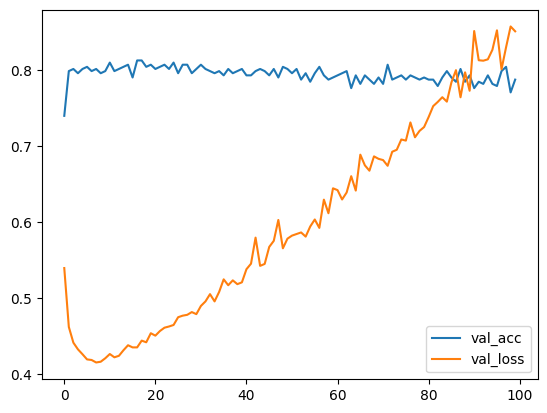

In [611]:
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Predicción del modelo

Configuramos los parámetros para predecir de acuerdo con el modelo

In [616]:
Y_pred = model.predict(X_test).round().astype(int)
Y_pred

12/12 [==============================] - 0s 1ms/step


array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

Se visualiza el vector de predicción. Esto quiere decir que los valores cercanos a 0 son personas que no sobrevivieron y valores cercanos a 1 son personas que sobrevivieron.

In [613]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, Y_pred)
cf


array([[192,  32],
       [ 44,  89]], dtype=int64)

Hacemos una predicción con los parámetros analizados:
PassegerId = 53
Pclass = 2
Sex = 0 (Hombre)
Age = 24
SibSp = 0
Fare = 105
Cabin = 65
Embarked = 0

In [614]:
pasajero = model.predict([[53,2,0,24,0,105,1,2]])
pasajero
if pasajero[0] == 0:
    print('El pasajero vivió')
else: print('El pasajero murió')

1/1 [==============================] - 0s 86ms/step
El pasajero vivió


Fuentes consultadas:
